In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
data = pd.read_csv("crime/01_District_wise_crimes_committed_IPC_2001_2012.csv")
# data.columns

In [10]:
data2 = pd.read_csv("crime/01_District_wise_crimes_committed_IPC_2013.csv")
# data2.columns

In [9]:
data3 = pd.read_csv("crime/01_District_wise_crimes_committed_IPC_2014.csv")
# data3.columns

In [12]:
data3.rename(columns={
    'States/UTs': 'STATE/UT',
    'District': 'DISTRICT',
    'Year': 'YEAR',
    'Murder': 'MURDER',
    'Attempt to commit Murder': 'ATTEMPT TO MURDER',
    'Culpable Homicide not amounting to Murder': 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
    'Rape': 'RAPE',
    'Custodial Rape': 'CUSTODIAL RAPE',
    'Rape other than Custodial': 'OTHER RAPE',
    'Kidnapping & Abduction': 'KIDNAPPING & ABDUCTION',
    'Dacoity': 'DACOITY',
    'Robbery': 'ROBBERY',
    'Criminal Trespass/Burglary': 'BURGLARY',
    'Theft': 'THEFT',
    'Auto Theft': 'AUTO THEFT',
    'Other Thefts': 'OTHER THEFT',
    'Riots': 'RIOTS',
    'Criminal Breach of Trust': 'CRIMINAL BREACH OF TRUST',
    'Cheating': 'CHEATING',
    'Counterfeiting': 'COUNTERFIETING',
    'Arson': 'ARSON',
    'Total Cognizable IPC crimes': 'TOTAL IPC CRIMES',
    'Other IPC crimes': 'OTHER IPC CRIMES'
}, inplace=True)


In [13]:
# Get the intersection of columns
common_cols = list(set(data.columns) & set(data2.columns) & set(data3.columns))

# Subset all dataframes
data = data[common_cols]
data2 = data2[common_cols]
data3 = data3[common_cols]


In [16]:
combined_data = pd.concat([data, data2, data3], ignore_index=True)
combined_data.columns 

Index(['DISTRICT', 'CUSTODIAL RAPE', 'OTHER IPC CRIMES', 'STATE/UT',
       'OTHER RAPE', 'CRIMINAL BREACH OF TRUST',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'THEFT', 'RAPE', 'RIOTS',
       'KIDNAPPING & ABDUCTION', 'ROBBERY', 'YEAR', 'AUTO THEFT',
       'OTHER THEFT', 'ATTEMPT TO MURDER', 'MURDER', 'ARSON',
       'TOTAL IPC CRIMES', 'DACOITY', 'COUNTERFIETING', 'BURGLARY',
       'CHEATING'],
      dtype='object')

In [20]:
combined_data.shape

(10678, 23)

In [42]:
combined_data.to_csv("crime/combined_crime_data.csv", index=False)

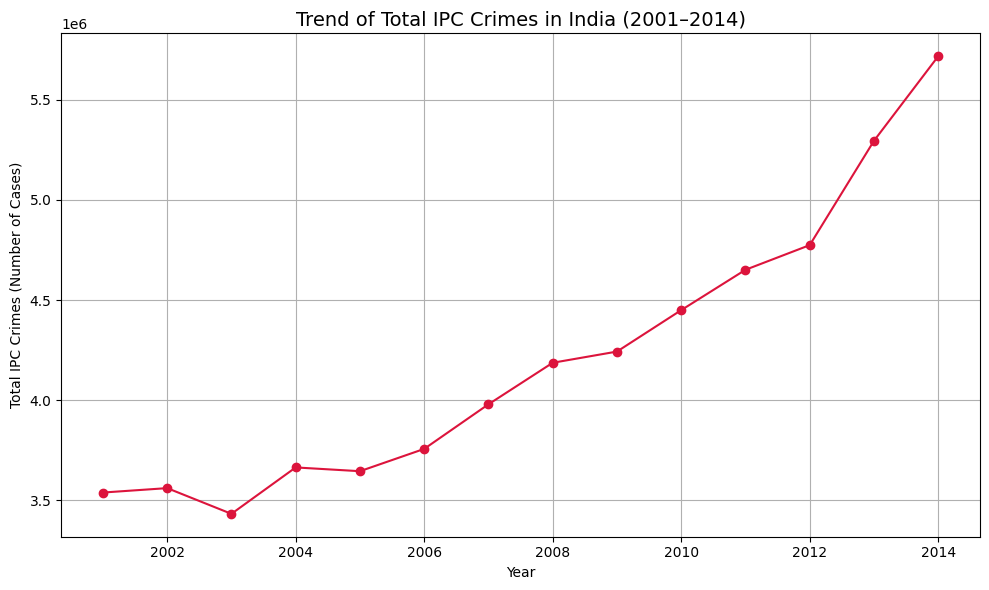

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(yearly.index, yearly.values, marker='o', color='crimson')
plt.title('Trend of Total IPC Crimes in India (2001–2014)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes (Number of Cases)')
plt.grid(True)
plt.tight_layout()
plt.show()


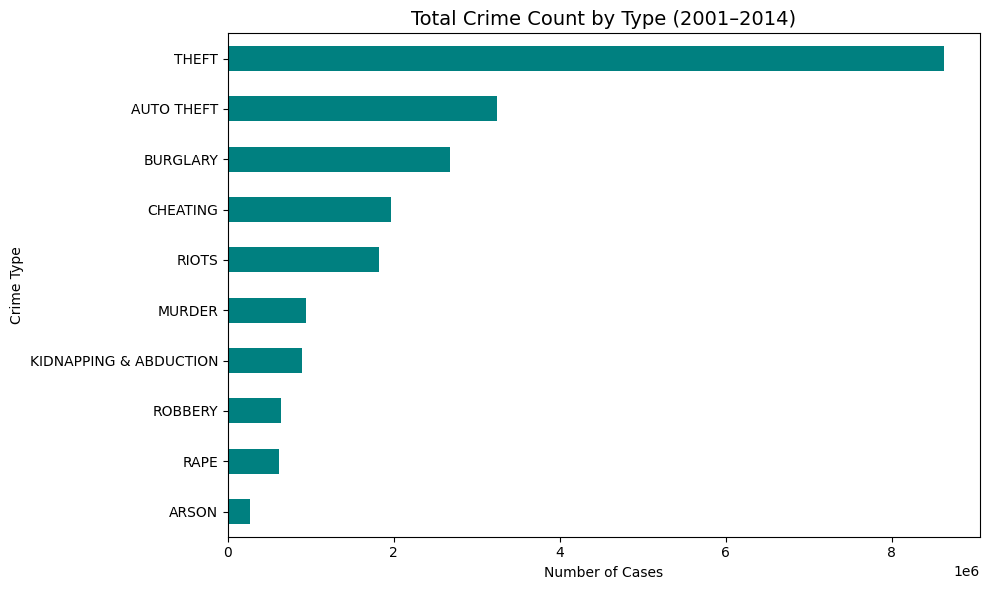

In [38]:
plt.figure(figsize=(10, 6))
total_crimes_by_type.plot(kind='barh', color='teal')
plt.title('Total Crime Count by Type (2001–2014)', fontsize=14)
plt.xlabel('Number of Cases')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()


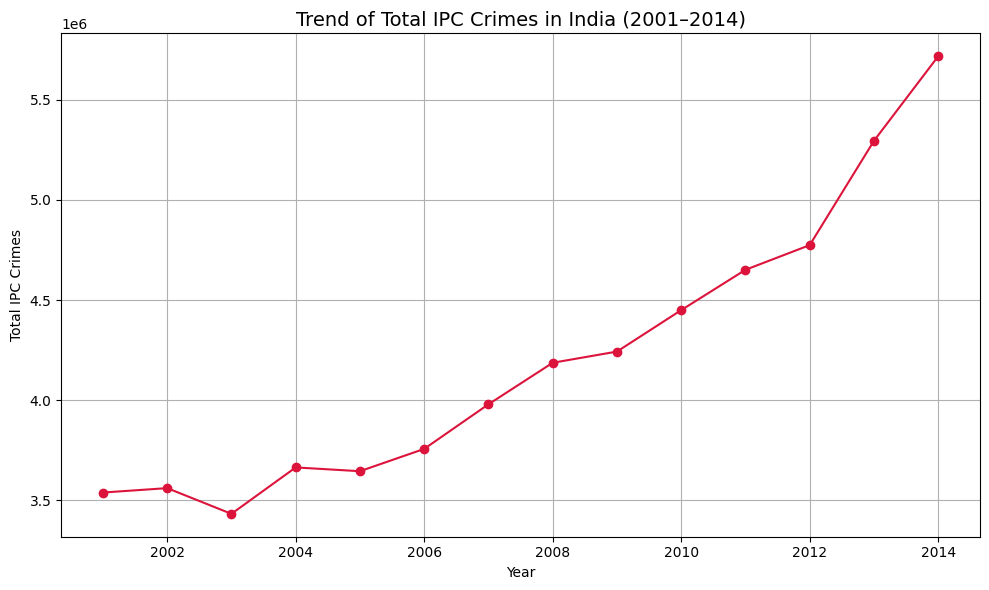

In [25]:
yearly = combined_data.groupby('YEAR')['TOTAL IPC CRIMES'].sum()

plt.figure(figsize=(10, 6))
plt.plot(yearly.index, yearly.values, marker='o', color='crimson')
plt.title('Trend of Total IPC Crimes in India (2001–2014)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

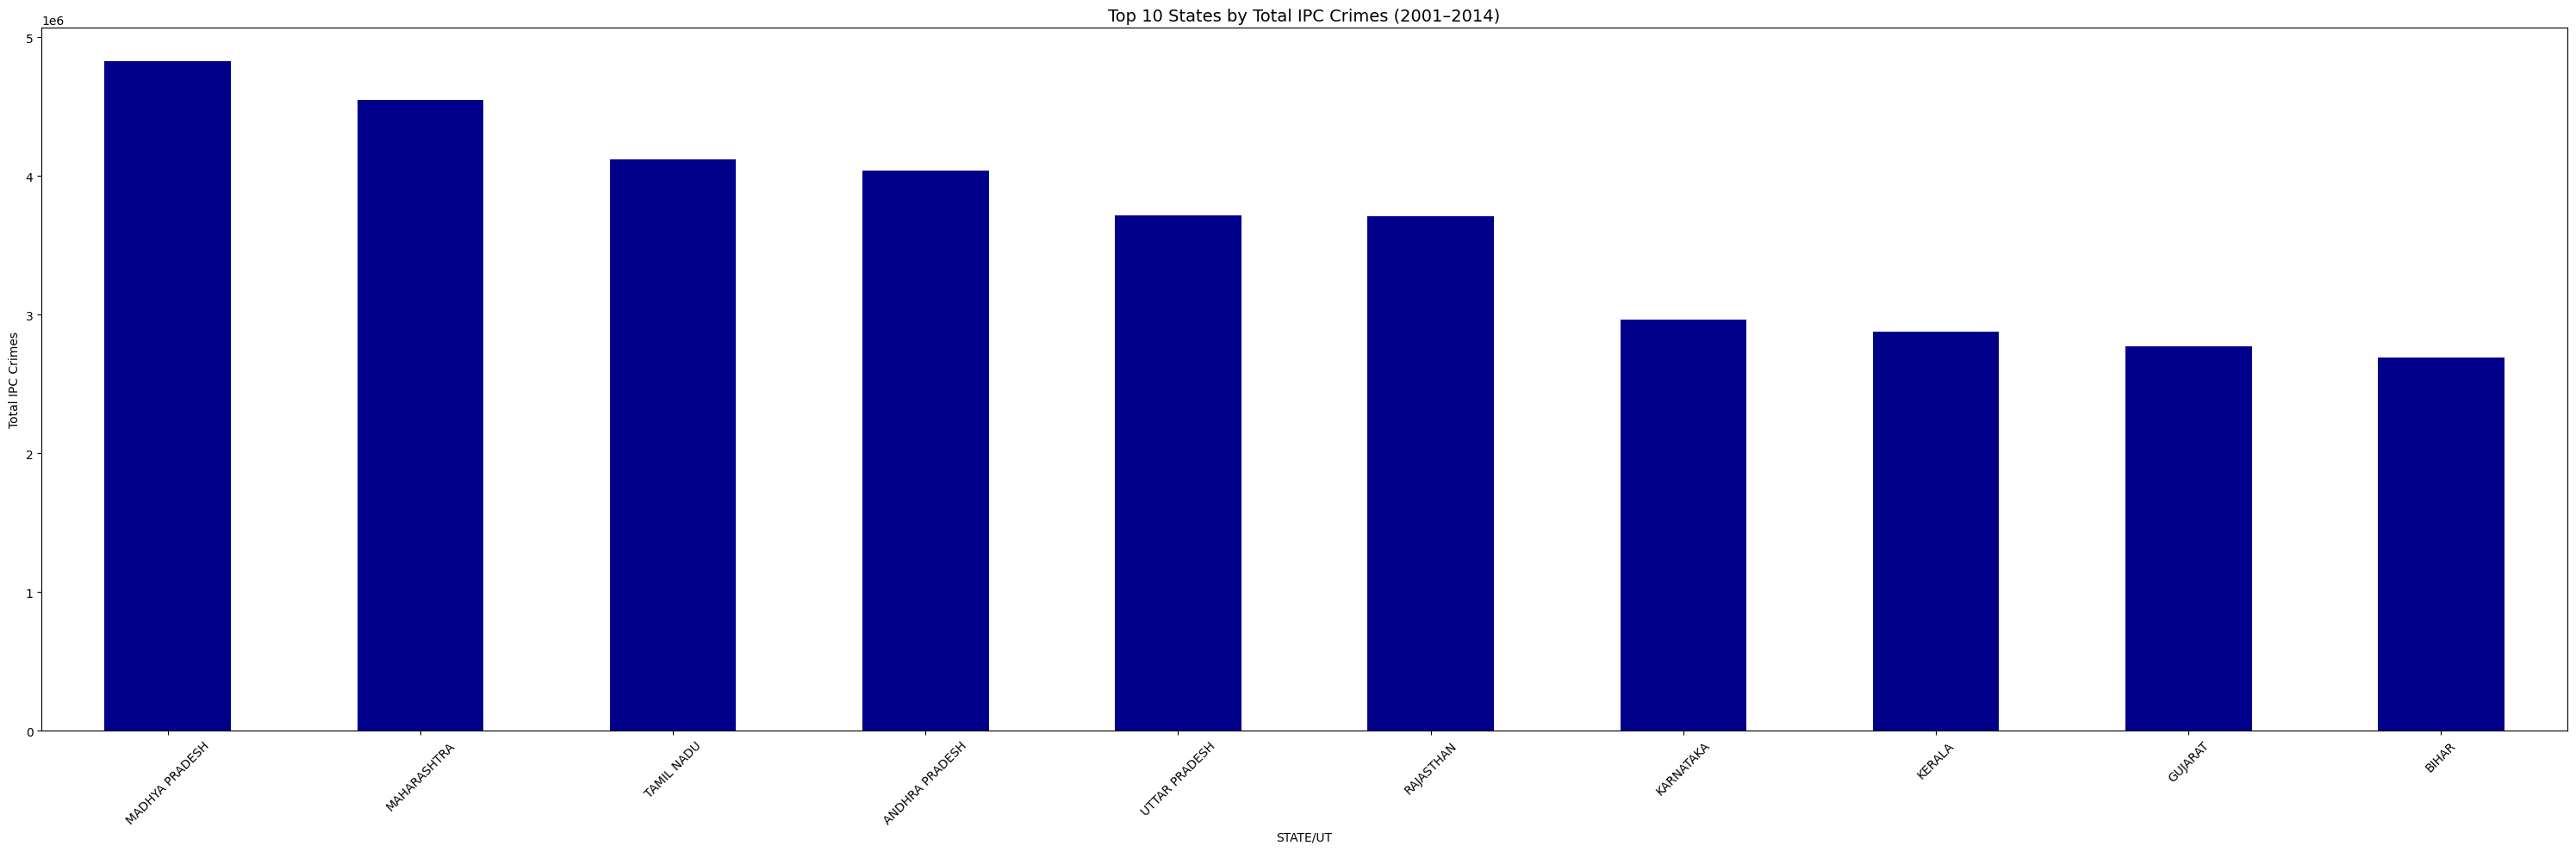

In [41]:
top_states = combined_data.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(30, 10))
top_states.plot(kind='bar', color='darkblue')
plt.title('Top 10 States by Total IPC Crimes (2001–2014)', fontsize=14)
plt.ylabel('Total IPC Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


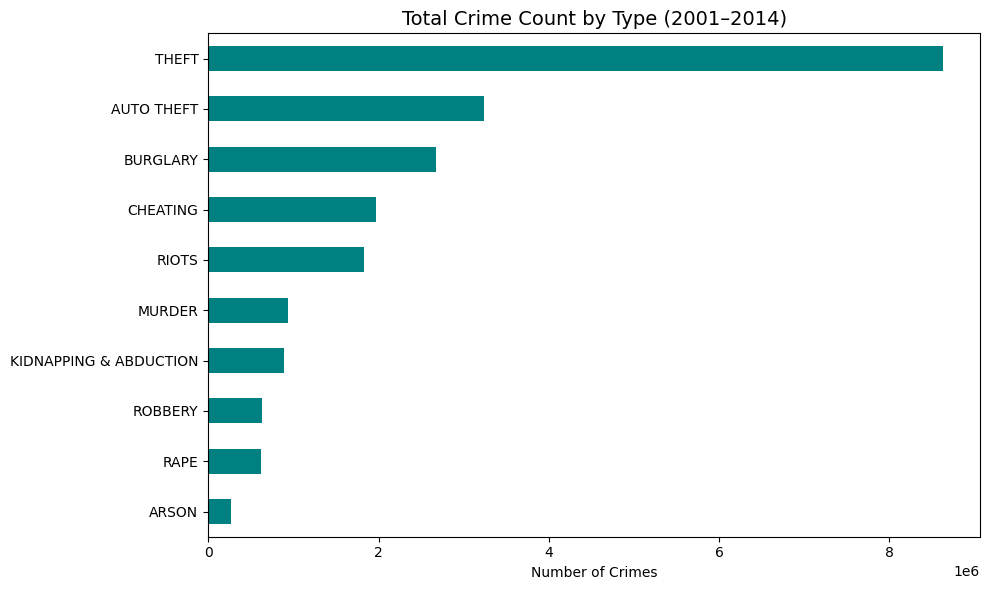

In [30]:
crime_types = ['MURDER', 'RAPE', 'ROBBERY', 'RIOTS', 'THEFT', 'AUTO THEFT',
               'KIDNAPPING & ABDUCTION', 'CHEATING', 'BURGLARY', 'ARSON']

total_crimes_by_type = combined_data[crime_types].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
total_crimes_by_type.plot(kind='barh', color='teal')
plt.title('Total Crime Count by Type (2001–2014)', fontsize=14)
plt.xlabel('Number of Crimes')
plt.tight_layout()
plt.show()


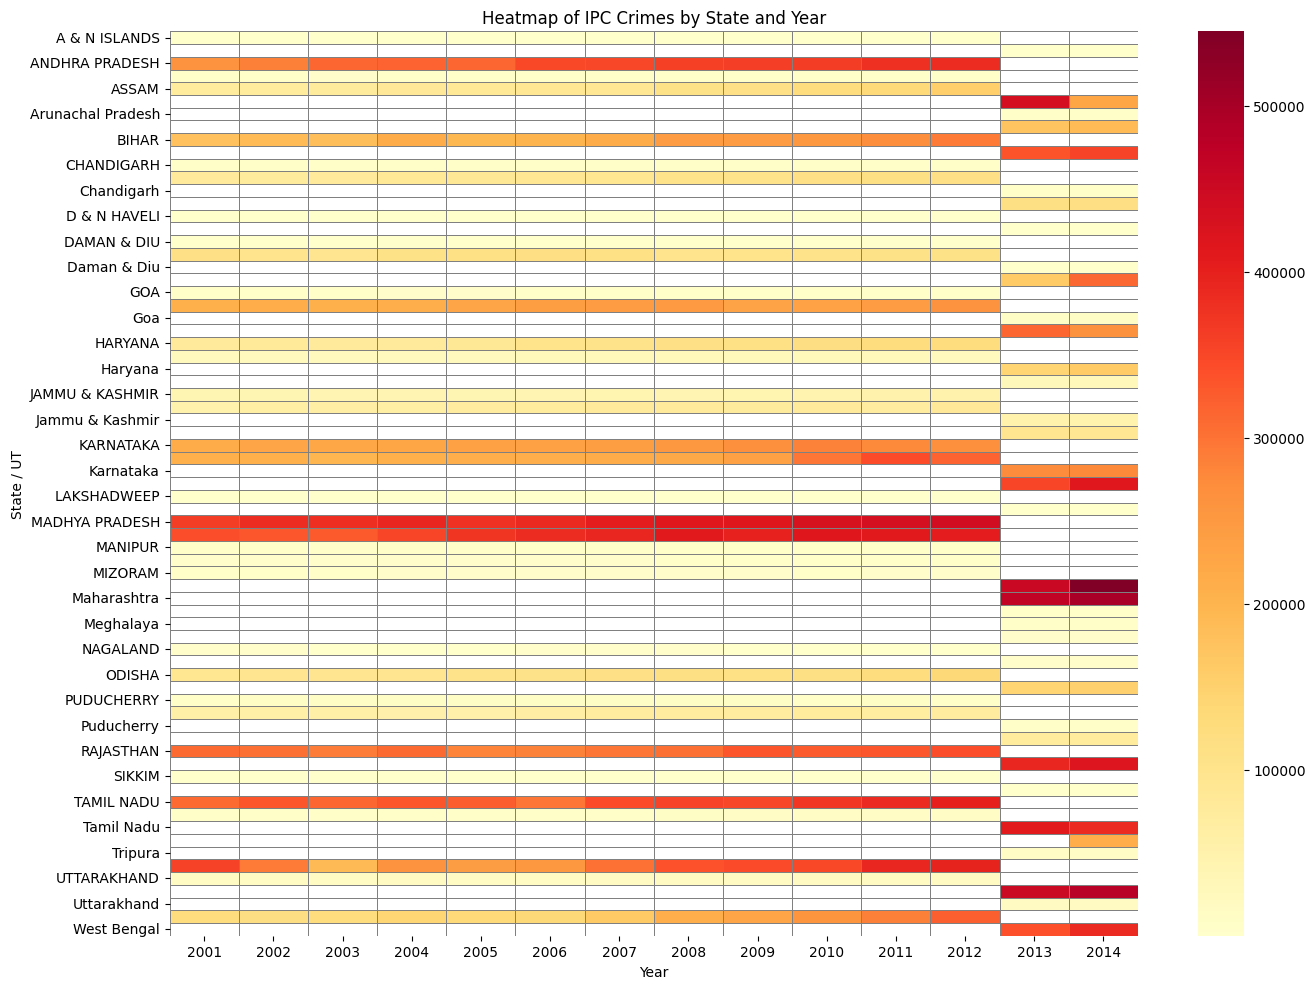

In [31]:
import seaborn as sns

pivot = combined_data.pivot_table(index='STATE/UT', columns='YEAR', values='TOTAL IPC CRIMES', aggfunc='sum')

plt.figure(figsize=(14, 10))
sns.heatmap(pivot, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Heatmap of IPC Crimes by State and Year')
plt.xlabel('Year')
plt.ylabel('State / UT')
plt.tight_layout()
plt.show()
